# New York City Taxi Trip Duration

Share code and data to improve ride time predictions

---

## Contents

- First EDA
- 독립변수 수정 / 추가
- 데이터 분석
- 레버리지 (Leverage)
- 아웃라이어 (Outlier)
- 스케일링 (Scaling)
- 변수변환 
- 다중공선성 (multicollinearity)
- 다항회귀 (Polynomial)
- 최적화 (optimization)
- 교차검증 (Cross Validation)
- 정규화 선형회귀
- 최적 정규화

---

## 0. Setting 

In [1]:
from taxi_pakage import *
from encoding_data import *

/usr/local/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# data set
taxi = pd.read_csv('train.csv')
taxi.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.98,40.75,-73.99,40.74,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.00,40.75,-73.97,40.80,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.96,40.77,-74.00,40.71,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.98,40.75,-73.97,40.76,N,373
1458643,id1209952,1,2016-04-05 14:44:25,2016-04-05 14:47:43,1,-73.98,40.78,-73.97,40.79,N,198


---

## 1. First EDA

### 1.1 종합 EDA

#### 1.1.1 Meaning

| Values | Meaning |
|-|-|
|id | a unique identifier for each trip |
|vendor_id | a code indicating the provider associated with the trip record |
|pickup_datetime|date and time when the meter was engaged |
|dropoff_datetime|date and time when the meter was disengaged|
|passenger_count|the number of passengers in the vehicle (driver entered value)|
|pickup_longitude|the longitude where the meter was engaged|
|pickup_latitude| the latitude where the meter was engaged|
|dropoff_longitude| the longitude where the meter was disngaged|
|dropoff_latitude| the latitude where the meter was disengaged|
|store_and_fwd_flag|This indicates whether the trip record was held in vehicle memory |
|trip_duration|duration of the trip in seconds|

#### 1.1.2 Information

In [3]:
# 데이터 크기
taxi.shape # 1,458,644개 데이터, 11개의 컬럼으로 구성

(1458644, 11)

In [4]:
# 데이터에 대한 정보 (컬럼 개수, null값 여부, 데이터 유형)
taxi.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
id                    1458644 non-null object
vendor_id             1458644 non-null int64
pickup_datetime       1458644 non-null object
dropoff_datetime      1458644 non-null object
passenger_count       1458644 non-null int64
pickup_longitude      1458644 non-null float64
pickup_latitude       1458644 non-null float64
dropoff_longitude     1458644 non-null float64
dropoff_latitude      1458644 non-null float64
store_and_fwd_flag    1458644 non-null object
trip_duration         1458644 non-null int64
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


- object : id, pickup_datetime, dropoff_datetime, store_and_fwd_flag
- int : vendor_id, passenger_count, trip_duration
- float : pickup_logitude, pickup_latitude, dropoff_logitude, dropoff_latitude

In [5]:
# Descriptive statistics
taxi.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1458644.00,1458644.00,1458644.00,1458644.00,1458644.00,1458644.00,1458644.00
mean,1.53,1.66,-73.97,40.75,-73.97,40.75,959.49
std,0.50,1.31,0.07,0.03,0.07,0.04,5237.43
min,1.00,0.00,-121.93,34.36,-121.93,32.18,1.00
25%,1.00,1.00,-73.99,40.74,-73.99,40.74,397.00
50%,2.00,1.00,-73.98,40.75,-73.98,40.75,662.00
75%,2.00,2.00,-73.97,40.77,-73.96,40.77,1075.00
max,2.00,9.00,-61.34,51.88,-61.34,43.92,3526282.00


### 1.2 개별 변수 EDA

#### 1.2.1 Countplot

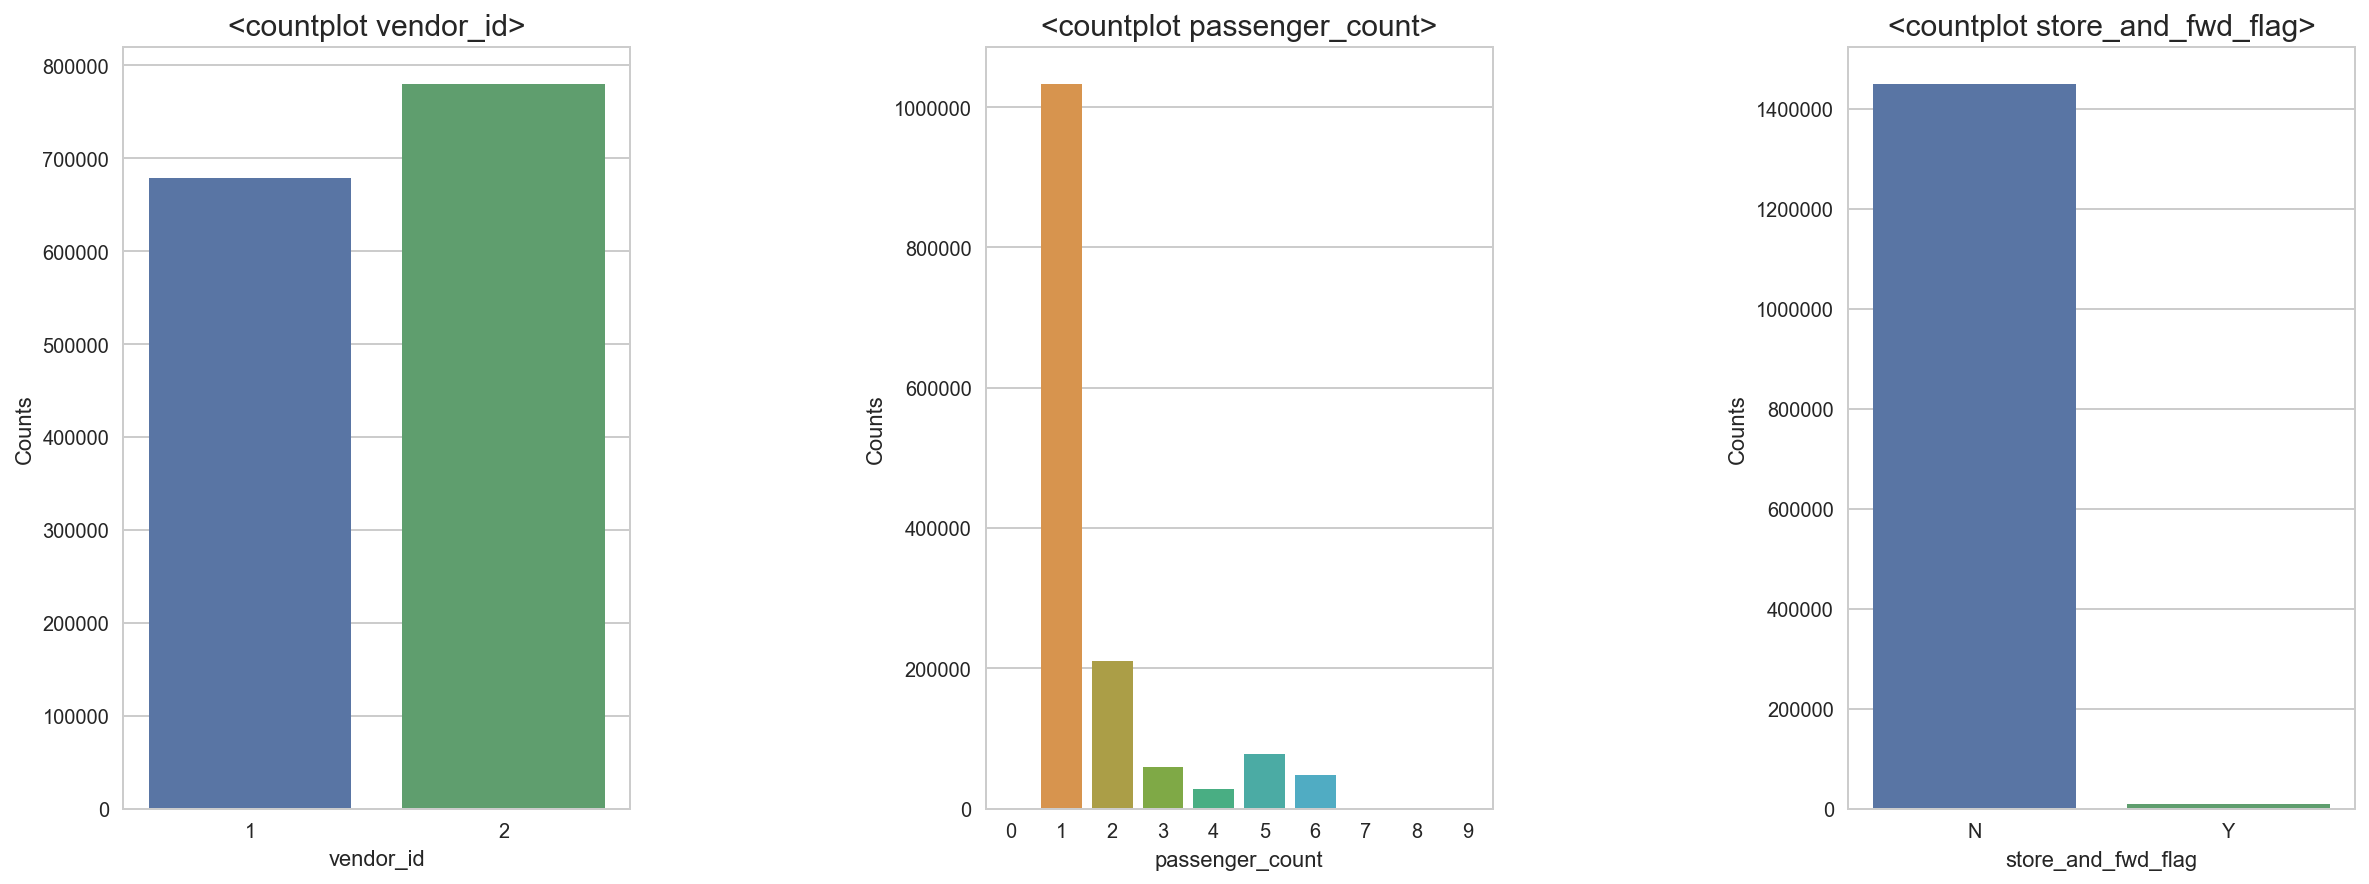

In [6]:
# countplot
plt.figure(figsize=(20, 7))
plt.subplots_adjust(wspace = 0.7)

# vendor_id
plt.subplot(131)
sns.countplot(x = 'vendor_id', data = taxi)
plt.title('<countplot vendor_id>', fontsize = 15)
plt.xlabel('vendor_id')
plt.ylabel('Counts')

# passenger_count
plt.subplot(132)
sns.countplot(x = 'passenger_count', data = taxi)
plt.title('<countplot passenger_count>', fontsize = 15)
plt.xlabel('passenger_count')
plt.ylabel('Counts')

# store_and_fwd_flag
plt.subplot(133)
sns.countplot(x = 'store_and_fwd_flag', data = taxi)
plt.title('<countplot store_and_fwd_flag>', fontsize = 15)
plt.xlabel('store_and_fwd_flag')
plt.ylabel('Counts')

plt.show()

#### 1.2.2 Boxplot

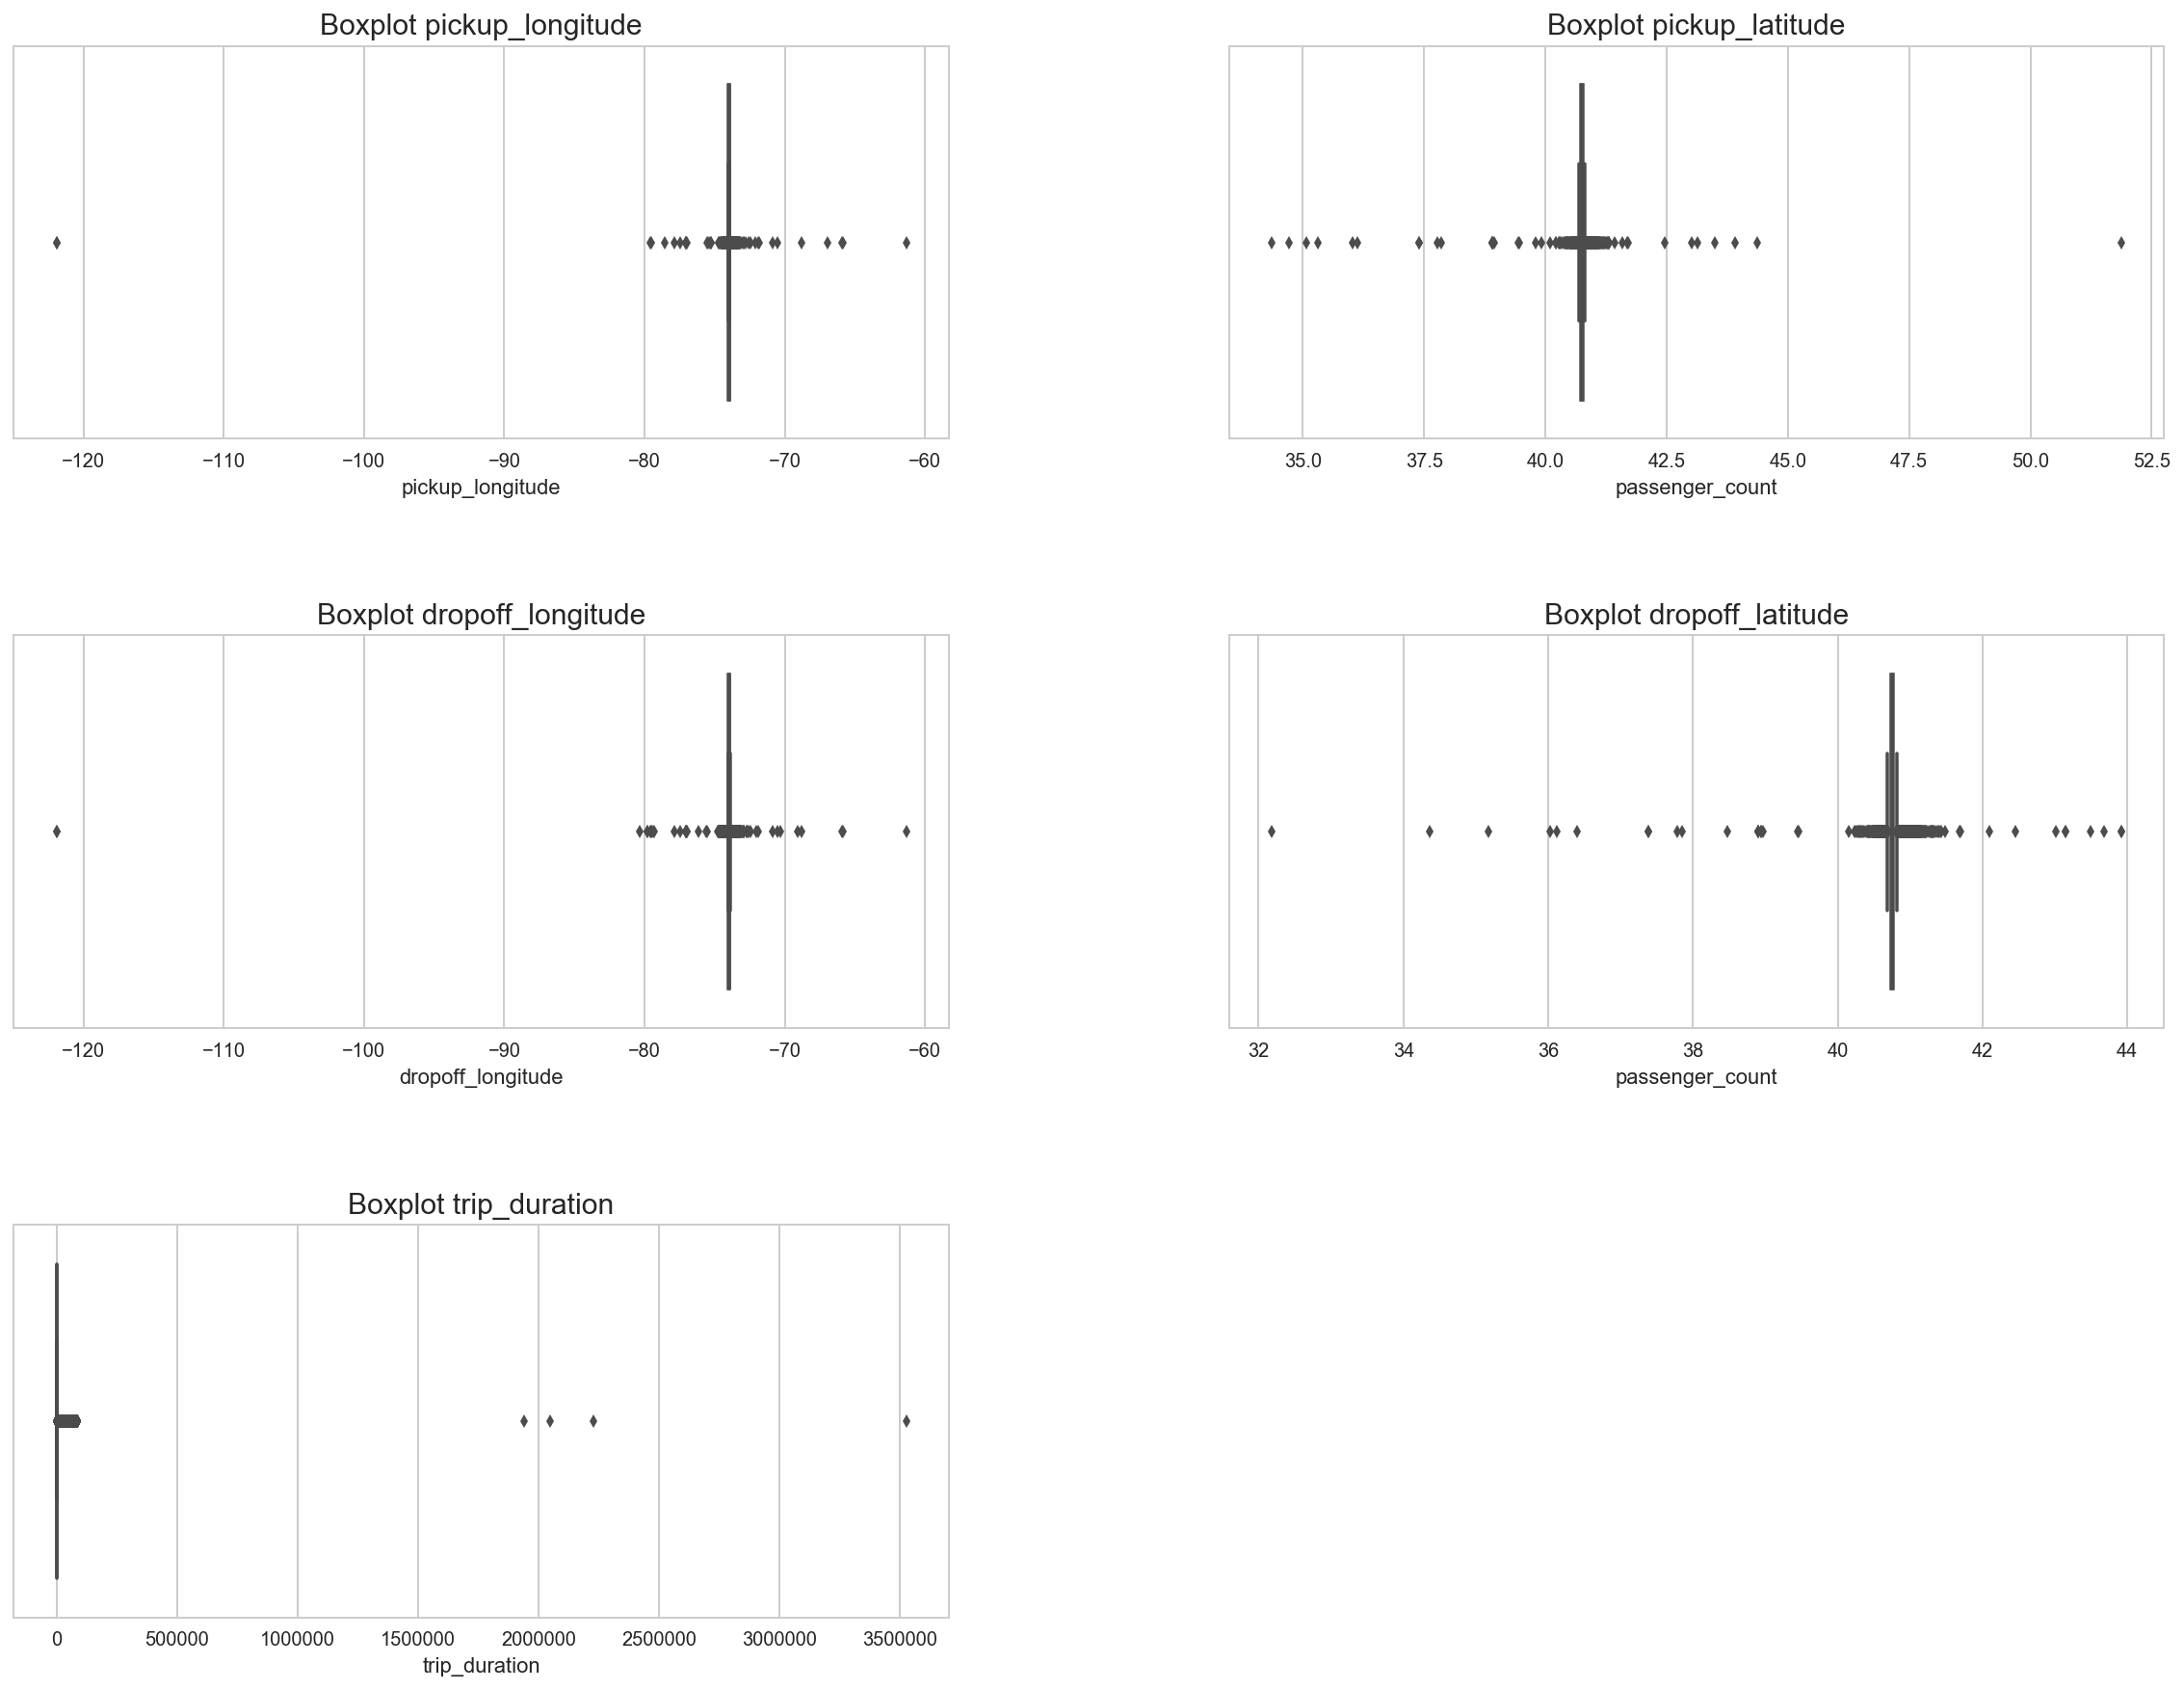

In [7]:
# boxplot
plt.figure(figsize=(20, 15))
plt.subplots_adjust(hspace = 0.5, wspace = 0.3)

# pickup_longitude
plt.subplot(321)
sns.boxplot(x = 'pickup_longitude', data = taxi)
plt.title('Boxplot pickup_longitude', fontsize = 15)
plt.xlabel('pickup_longitude')

# pickup_latitude
plt.subplot(322)
sns.boxplot(x = 'pickup_latitude', data = taxi)
plt.title('Boxplot pickup_latitude', fontsize = 15)
plt.xlabel('passenger_count')

# dropoff_longitude
plt.subplot(323)
sns.boxplot(x = 'dropoff_longitude', data = taxi)
plt.title('Boxplot dropoff_longitude', fontsize = 15)
plt.xlabel('dropoff_longitude')

# dropoff_latitude
plt.subplot(324)
sns.boxplot(x = 'dropoff_latitude', data = taxi)
plt.title('Boxplot dropoff_latitude', fontsize = 15)
plt.xlabel('passenger_count')

# Trip_druation
plt.subplot(325)
sns.boxplot(x = 'trip_duration', data = taxi)
plt.title('Boxplot trip_duration', fontsize = 15)
plt.xlabel('trip_duration')

plt.show()

#### 1.2.3 Histogram

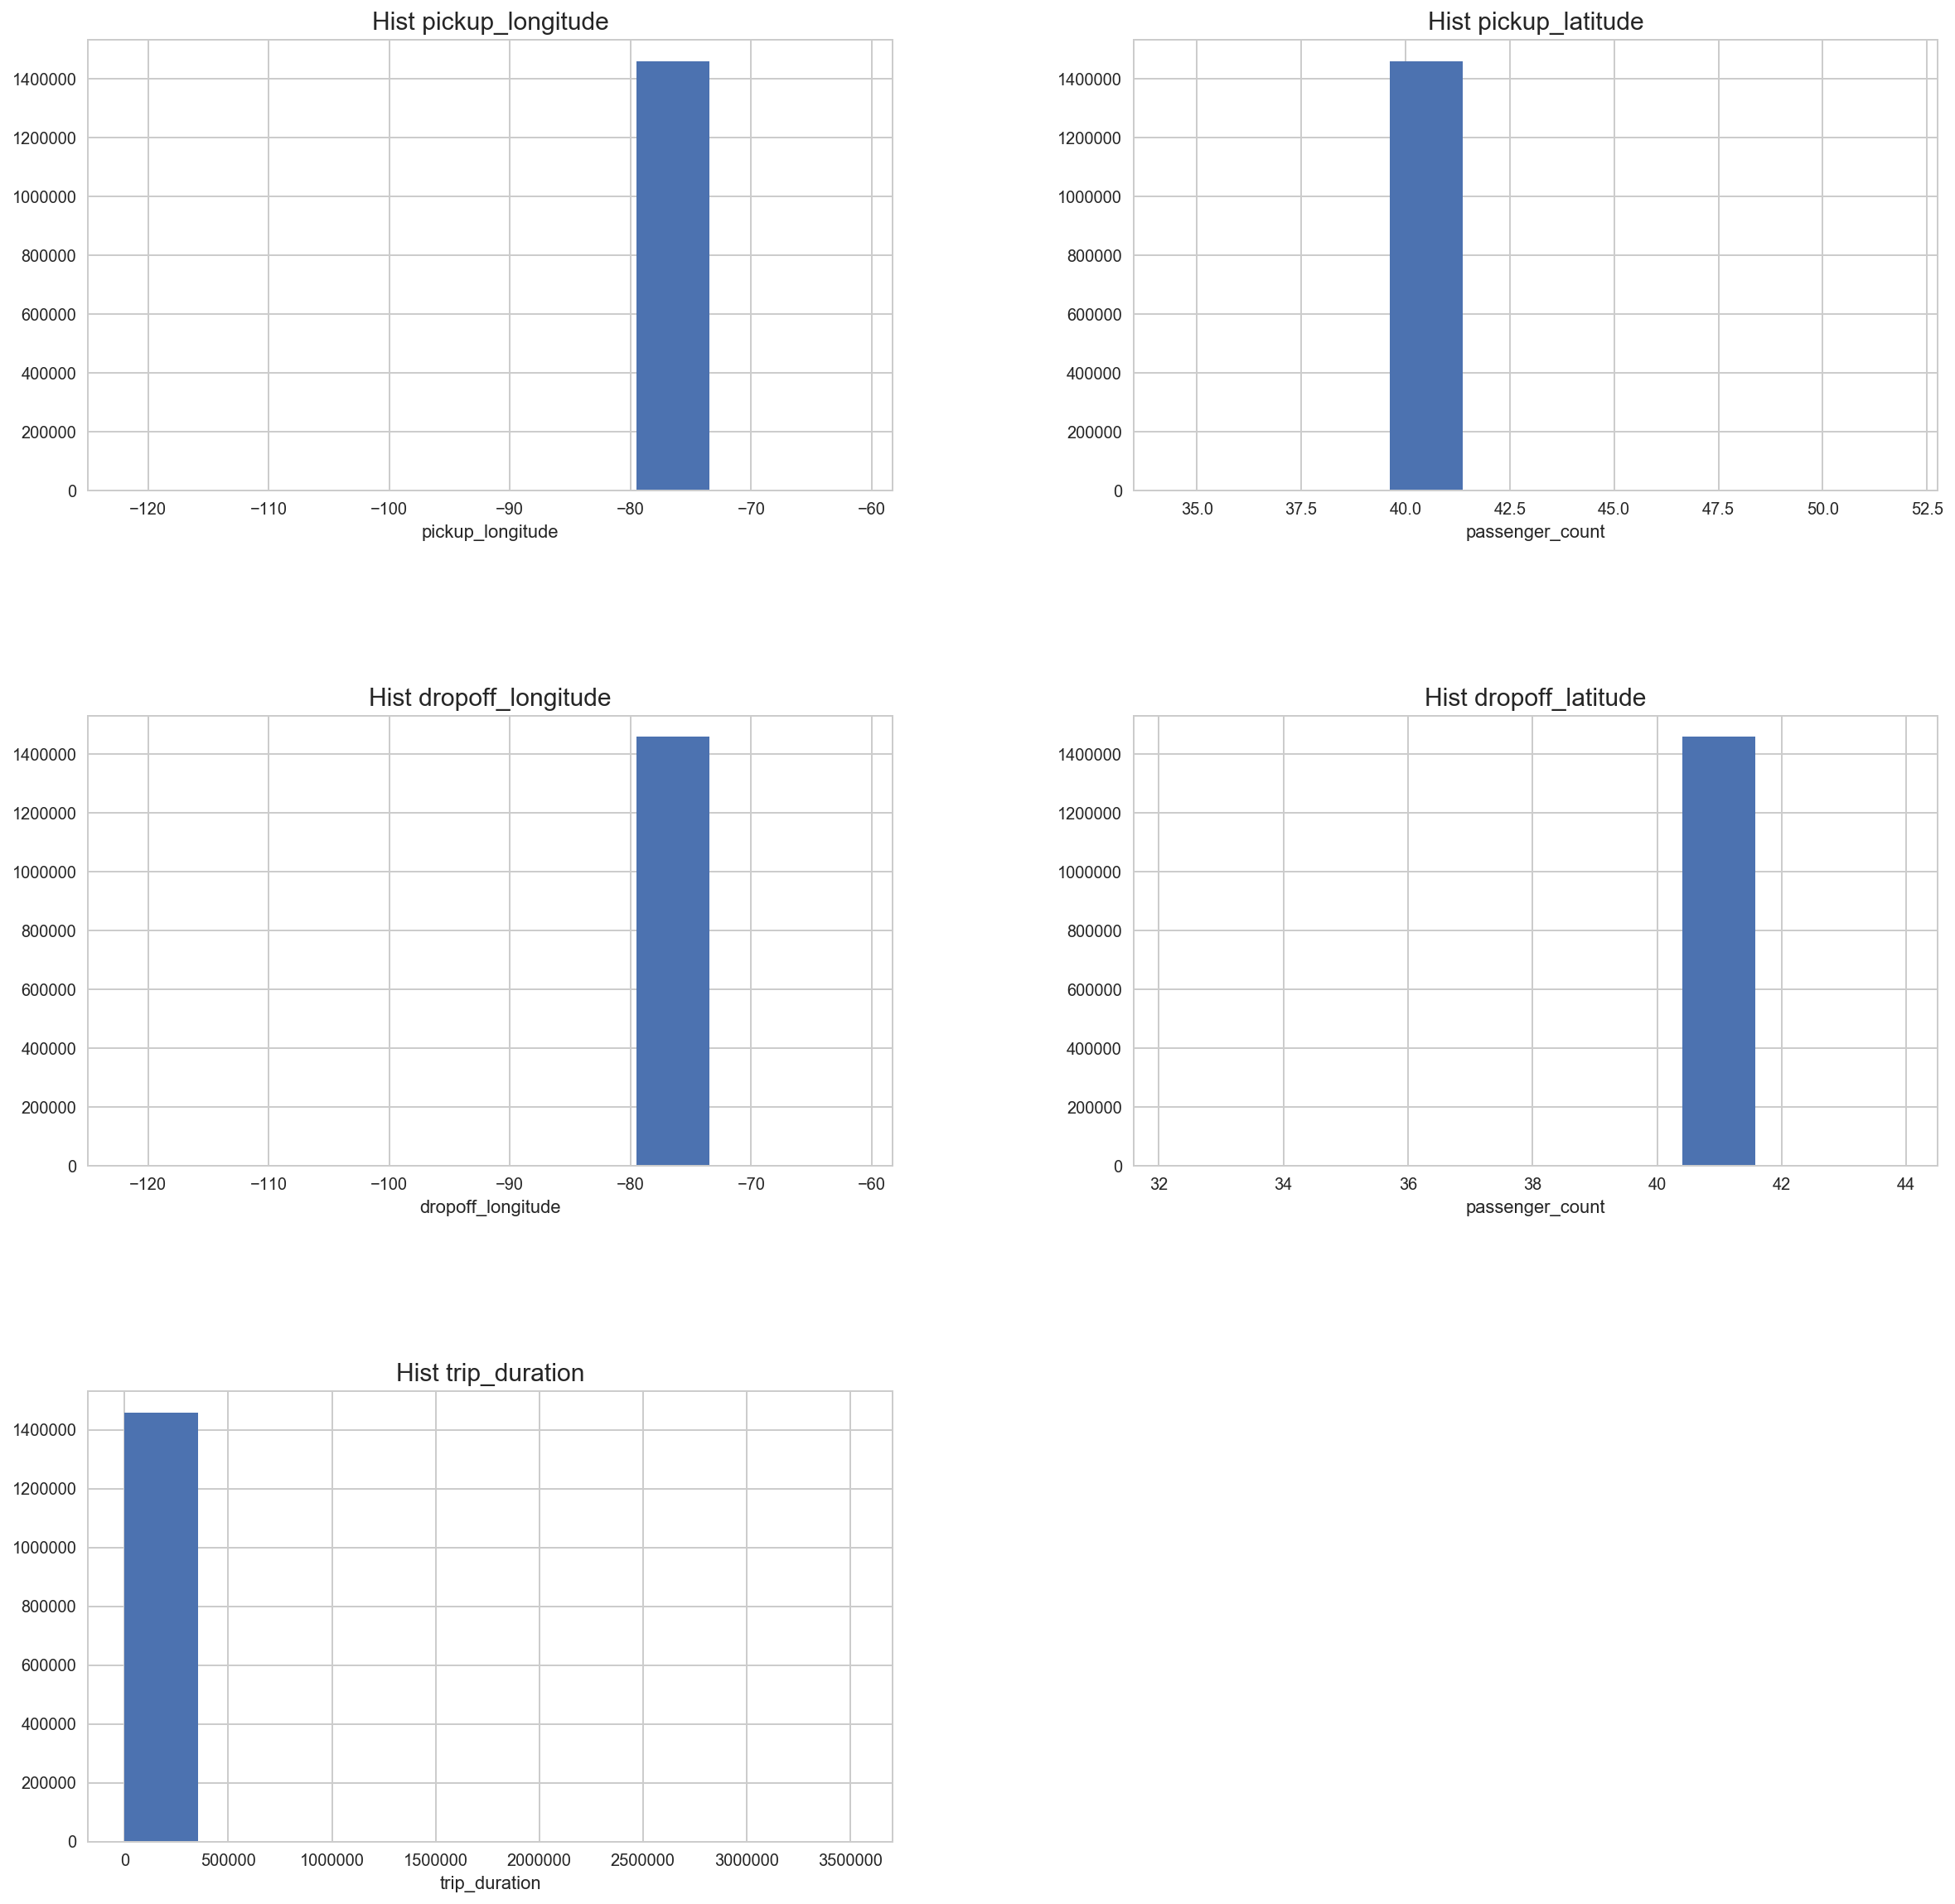

In [8]:
# histogram
plt.figure(figsize=(20, 20))
plt.subplots_adjust(hspace = 0.5, wspace = 0.3)

# pickup_longitude
plt.subplot(321)
plt.hist(x = 'pickup_longitude', data = taxi)
plt.title('Hist pickup_longitude', fontsize = 15)
plt.xlabel('pickup_longitude')

# pickup_latitude
plt.subplot(322)
plt.hist(x = 'pickup_latitude', data = taxi)
plt.title('Hist pickup_latitude', fontsize = 15)
plt.xlabel('passenger_count')

# dropoff_longitude
plt.subplot(323)
plt.hist(x = 'dropoff_longitude', data = taxi)
plt.title('Hist dropoff_longitude', fontsize = 15)
plt.xlabel('dropoff_longitude')

# dropoff_latitude
plt.subplot(324)
plt.hist(x = 'dropoff_latitude', data = taxi)
plt.title('Hist dropoff_latitude', fontsize = 15)
plt.xlabel('passenger_count')

# Trip_druation
plt.subplot(325)
plt.hist(x = 'trip_duration', data = taxi)
plt.title('Hist trip_duration', fontsize = 15)
plt.xlabel('trip_duration')

plt.show()

### 1.3 독립변수 & 종속변수 EDA

In [9]:
# Trip_duration boxplot에서 나타난 4개의 이상치 제거
taxi_EDA = taxi[taxi['trip_duration'] < 1500000].reset_index(drop=True)

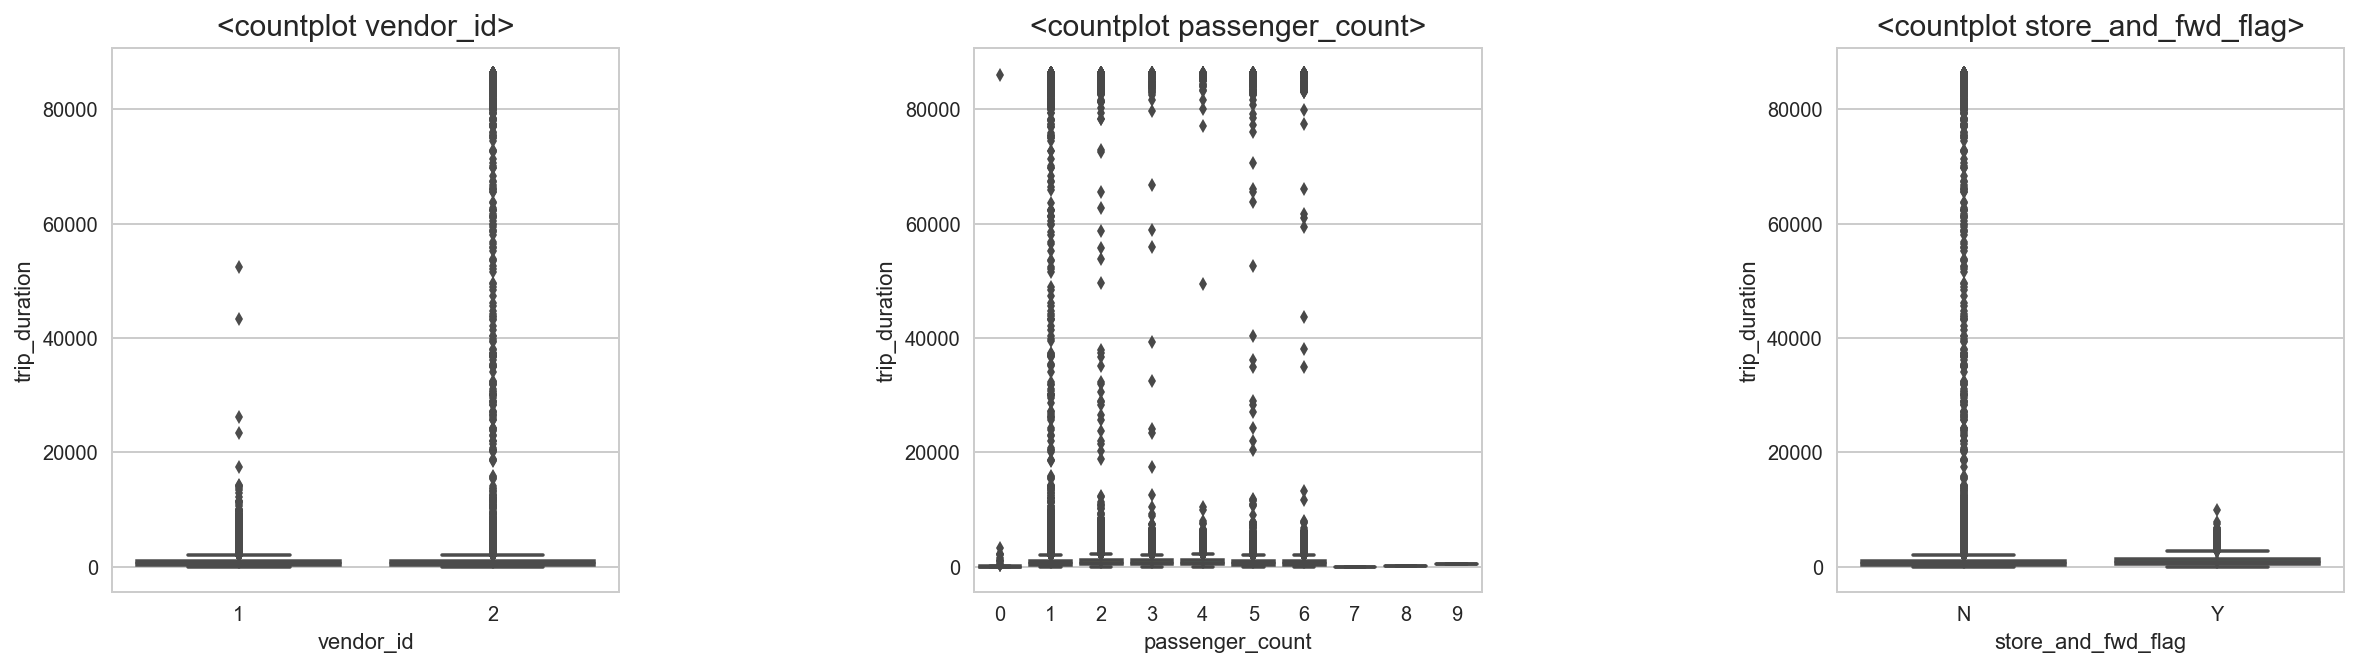

In [10]:
# countplot
plt.figure(figsize=(20, 5))
plt.subplots_adjust(wspace = 0.7)

# vendor_id
plt.subplot(131)
sns.boxplot(x = 'vendor_id', y = 'trip_duration', data = taxi_EDA)
plt.title('<countplot vendor_id>', fontsize = 15)
plt.xlabel('vendor_id')
plt.ylabel('trip_duration')

# passenger_count
plt.subplot(132)
sns.boxplot(x = 'passenger_count', y = 'trip_duration', data = taxi_EDA)
plt.title('<countplot passenger_count>', fontsize = 15)
plt.xlabel('passenger_count')
plt.ylabel('trip_duration')

# store_and_fwd_flag
plt.subplot(133)
sns.boxplot(x = 'store_and_fwd_flag', y = 'trip_duration', data = taxi_EDA)
plt.title('<countplot store_and_fwd_flag>', fontsize = 15)
plt.xlabel('store_and_fwd_flag')
plt.ylabel('trip_duration')

plt.show()

---

## 2. 독립변수 수정 / 추가

### 2.1 독립변수 수정

In [11]:
# id 숫자화 - 분석을 위해 숫자화
taxi['id'] = taxi['id'].apply(lambda x: x[2:])

# store_and_fwd_flag -  N, Y 를 0, 1 숫자로 변경
taxi['store_and_fwd_flag'] = taxi['store_and_fwd_flag'].apply(lambda x: 0 if x == 'N' else 1)

# pickup_datetime, dropoff_datetime 형식 바꿈
taxi['pickup_datetime'] = taxi['pickup_datetime'].apply(strptime)
taxi['dropoff_datetime'] = taxi['dropoff_datetime'].apply(strptime)

### 2.2 독립변수 추가

In [12]:
# 좌표를 이용해 거리 생성
taxi['dist'] = haversine_np(taxi['pickup_longitude'], taxi['pickup_latitude'], 
                            taxi['dropoff_longitude'], taxi['dropoff_latitude'])

# 시간 데이터를 2016.01.01 기준으로 숫사형으로 변경
taxi['pick_date'] = taxi['pickup_datetime'].apply(date_to_zero)
taxi['pick_time'] = taxi['pickup_datetime'].apply(time_to_zero)
taxi['drop_time'] = taxi['dropoff_datetime'].apply(time_to_zero)
taxi['weekday'] = taxi['pickup_datetime'].apply(week_num)

# holiday는 날짜별로 휴일인지 아닌 0, 1 카테고리값 부여
taxi['holiday'] = taxi['pickup_datetime'].apply(holiday)

In [13]:
# 분석을 위해 y(trip_duration)을 제일 끝으로 보냄
y = taxi['trip_duration'] 
taxi = taxi.drop(['pickup_datetime','dropoff_datetime','trip_duration'], axis=1)
taxi['trip_duration'] = y

In [14]:
# 변수 수정 / 추가된 데이터 저장 및 불러오기
taxi.to_csv('edited_taxi.csv', index = False)
taxi = pd.read_csv('edited_taxi.csv')

---

## 03. 레버리지 (Leverage)

In [15]:
taxi = pd.read_csv('edited_taxi.csv')
feature_n, features = get_features(taxi)
feature_n, features

(15,
 'id + vendor_id + passenger_count + pickup_longitude + pickup_latitude + dropoff_longitude + dropoff_latitude + store_and_fwd_flag + dist + pick_date + pick_time + drop_time + weekday + holiday + trip_duration')

In [16]:
# 분석을 위한 데이터 셋팅 (intercept추가)
taxi = dmatrix('{}'.format(features), taxi, return_type = 'dataframe')
taxi.tail()

,Intercept,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,dist,pick_date,pick_time,drop_time,weekday,holiday,trip_duration
1458639,1.00,2376096.00,2.00,4.00,-73.98,40.75,-73.99,40.74,0.00,1.22,98.00,48663.00,49441.00,5.00,1.00,778.00
1458640,1.00,1049543.00,1.00,1.00,-74.00,40.75,-73.97,40.80,0.00,6.05,9.00,27314.00,27969.00,7.00,1.00,655.00
1458641,1.00,2304944.00,2.00,1.00,-73.96,40.77,-74.00,40.71,0.00,7.82,112.00,25060.00,25824.00,5.00,1.00,764.00
1458642,1.00,2714485.00,1.00,1.00,-73.98,40.75,-73.97,40.76,0.00,1.09,4.00,57385.00,57758.00,2.00,1.00,373.00
1458643,1.00,1209952.00,1.00,1.00,-73.98,40.78,-73.97,40.79,0.00,1.13,95.00,53064.00,53262.00,2.00,1.00,198.00


In [17]:
# 독립변수 X 생성
feature_n, features = get_features(taxi, 1, -1) # Intercept, trip_duration 제거
feature_n, features

(14,
 'id + vendor_id + passenger_count + pickup_longitude + pickup_latitude + dropoff_longitude + dropoff_latitude + store_and_fwd_flag + dist + pick_date + pick_time + drop_time + weekday + holiday')

In [18]:
# 분석결과
model = sm.OLS.from_formula('trip_duration ~ {}'.format(features), data = taxi)
result = model.fit()

In [19]:
# (시간이 걸려서 일단 패스)
# influence = result.get_influence()
# hat = influence.hat_matrix_diag

# plt.figure(figsize = (10, 2))
# plt.stem(hat)
# plt.show()

---

## 04. 아웃라이어 (Outlier)

In [20]:
taxi_1, drop = erase_outlier_np(result, taxi, feature_n, dropped=True)
len(taxi_1), len(drop)

(1456326, 2318)

In [21]:
feature_n_1, features_1 = get_features(taxi_1, 1, -1)
feature_n_1, features_1

(14,
 'id + vendor_id + passenger_count + pickup_longitude + pickup_latitude + dropoff_longitude + dropoff_latitude + store_and_fwd_flag + dist + pick_date + pick_time + drop_time + weekday + holiday')

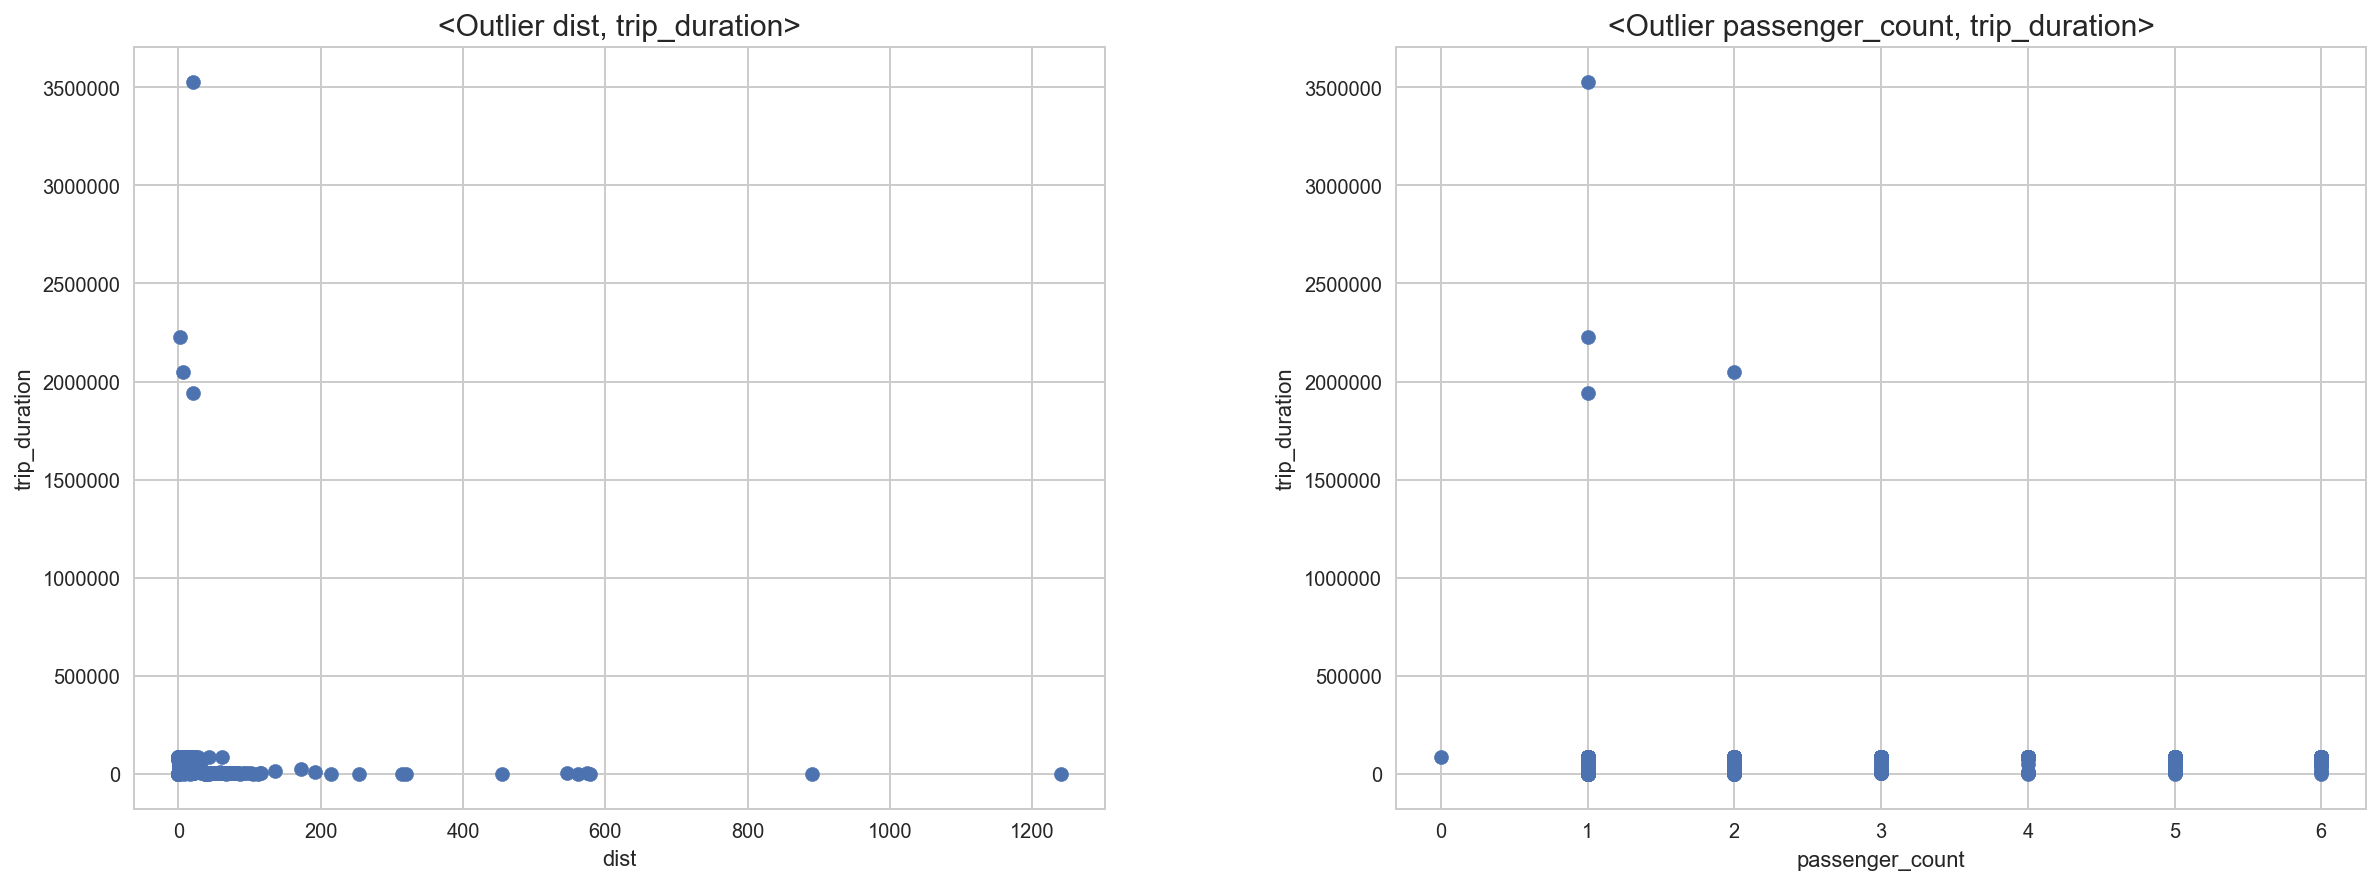

In [22]:
# Outlier
plt.figure(figsize = (20, 7))
plt.subplots_adjust(wspace = 0.3)

# outlier 제거 확인 (dist, trip_duration)
plt.subplot(121)
plt.scatter(drop['dist'], drop['trip_duration'])
plt.title('<Outlier dist, trip_duration>', fontsize = 15)
plt.xlabel('dist')
plt.ylabel('trip_duration')

# outlier 제거 확인 (passenger_count, trip_duration)
plt.subplot(122)
plt.scatter(drop['passenger_count'], drop['trip_duration'])
plt.title('<Outlier passenger_count, trip_duration>', fontsize = 15)
plt.xlabel('passenger_count')
plt.ylabel('trip_duration')


plt.show()

In [23]:
model_1 =  sm.OLS.from_formula("trip_duration ~ {}".format(features_1), data = taxi_1)
result_1 = model_1.fit()
result_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          trip_duration   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                 1.610e+05
Date:                Tue, 13 Mar 2018   Prob (F-statistic):               0.00
Time:                        00:56:04   Log-Likelihood:            -1.0833e+07
No. Observations:             1456326   AIC:                         2.167e+07
Df Residuals:                 1456311   BIC:                         2.167e+07
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -9.844e+04   1292.164    -76.182      0.000   -1.01e+05   -9.59e+04
id                  6.053e-07   2.95e-07      2.050      0.040    2.65e-08    1.18e-06
vendor_id              0.8521      0.716      1.190      0.234      -0.551       2.255
passenger_count        3.4683      0.271     12.791      0.000       2.937       4.000
pickup_longitude    -558.1743     10.494    -53.188      0.000    -578.743    -537.606
pickup_latitude     1017.6884     14.099     72.183      0.000     990.055    1045.322
dropoff_longitude   -934.2945     10.458    -89.337      0.000    -954.792    -913.797
dropoff_latitude   -1301.1687     11.931   -109.059      0.000   -1324.553   -1277.785
store_and_fwd_flag    34.3560      4.627      7.426      0.000      25.288      43.424
dist                 135.7249      0.112   1217.121      0.000     135.506     135.943
pick_date              0.5475      0.007     81.937      0.000       0.534       0.561
pick_time             -0.0016    4.1e-05    -38.693      0.000      -0.002      -0.002
drop_time              0.0029   4.05e-05     70.701      0.000       0.003       0.003
weekday              -13.4496      0.177    -76.195      0.000     -13.796     -13.104
holiday             -105.0081      2.222    -47.260      0.000    -109.363    -100.653
==============================================================================
Omnibus:                   782315.469   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         21436280.680
Skew:                           2.052   Prob(JB):                         0.00
Kurtosis:                      21.342   Cond. No.                     8.75e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.75e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
# F-test 결과 vendor_id 제거
taxi_2 = taxi_1.drop(['id', 'vendor_id'], axis = 1)
taxi_2.tail()

,Intercept,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,dist,pick_date,pick_time,drop_time,weekday,holiday,trip_duration
1456321,1.00,4.00,-73.98,40.75,-73.99,40.74,0.00,1.22,98.00,48663.00,49441.00,5.00,1.00,778.00
1456322,1.00,1.00,-74.00,40.75,-73.97,40.80,0.00,6.05,9.00,27314.00,27969.00,7.00,1.00,655.00
1456323,1.00,1.00,-73.96,40.77,-74.00,40.71,0.00,7.82,112.00,25060.00,25824.00,5.00,1.00,764.00
1456324,1.00,1.00,-73.98,40.75,-73.97,40.76,0.00,1.09,4.00,57385.00,57758.00,2.00,1.00,373.00
1456325,1.00,1.00,-73.98,40.78,-73.97,40.79,0.00,1.13,95.00,53064.00,53262.00,2.00,1.00,198.00


In [25]:
feature_n_2, features_2 = get_features(taxi_2, 1, -1)
feature_n_2, features_2

(12,
 'passenger_count + pickup_longitude + pickup_latitude + dropoff_longitude + dropoff_latitude + store_and_fwd_flag + dist + pick_date + pick_time + drop_time + weekday + holiday')

In [26]:
model_2 =  sm.OLS.from_formula("trip_duration ~ {}".format(features_2), data = taxi_2)
result_2 = model_2.fit()
result_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          trip_duration   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                 1.879e+05
Date:                Tue, 13 Mar 2018   Prob (F-statistic):               0.00
Time:                        00:56:07   Log-Likelihood:            -1.0833e+07
No. Observations:             1456326   AIC:                         2.167e+07
Df Residuals:                 1456313   BIC:                         2.167e+07
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -9.843e+04   1292.138    -76.175      0.000   -1.01e+05   -9.59e+04
passenger_count        3.5618      0.260     13.711      0.000       3.053       4.071
pickup_longitude    -557.9910     10.493    -53.175      0.000    -578.558    -537.424
pickup_latitude     1017.7650     14.099     72.189      0.000     990.132    1045.398
dropoff_longitude   -934.3066     10.458    -89.338      0.000    -954.804    -913.809
dropoff_latitude   -1301.1487     11.931   -109.058      0.000   -1324.533   -1277.765
store_and_fwd_flag    33.9343      4.613      7.357      0.000      24.893      42.975
dist                 135.7252      0.112   1217.125      0.000     135.507     135.944
pick_date              0.5475      0.007     81.934      0.000       0.534       0.561
pick_time             -0.0016    4.1e-05    -38.691      0.000      -0.002      -0.002
drop_time              0.0029   4.05e-05     70.703      0.000       0.003       0.003
weekday              -13.4510      0.177    -76.203      0.000     -13.797     -13.105
holiday             -105.0035      2.222    -47.258      0.000    -109.358    -100.649
==============================================================================
Omnibus:                   782332.232   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         21437980.785
Skew:                           2.052   Prob(JB):                         0.00
Kurtosis:                      21.343   Cond. No.                     2.98e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.98e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

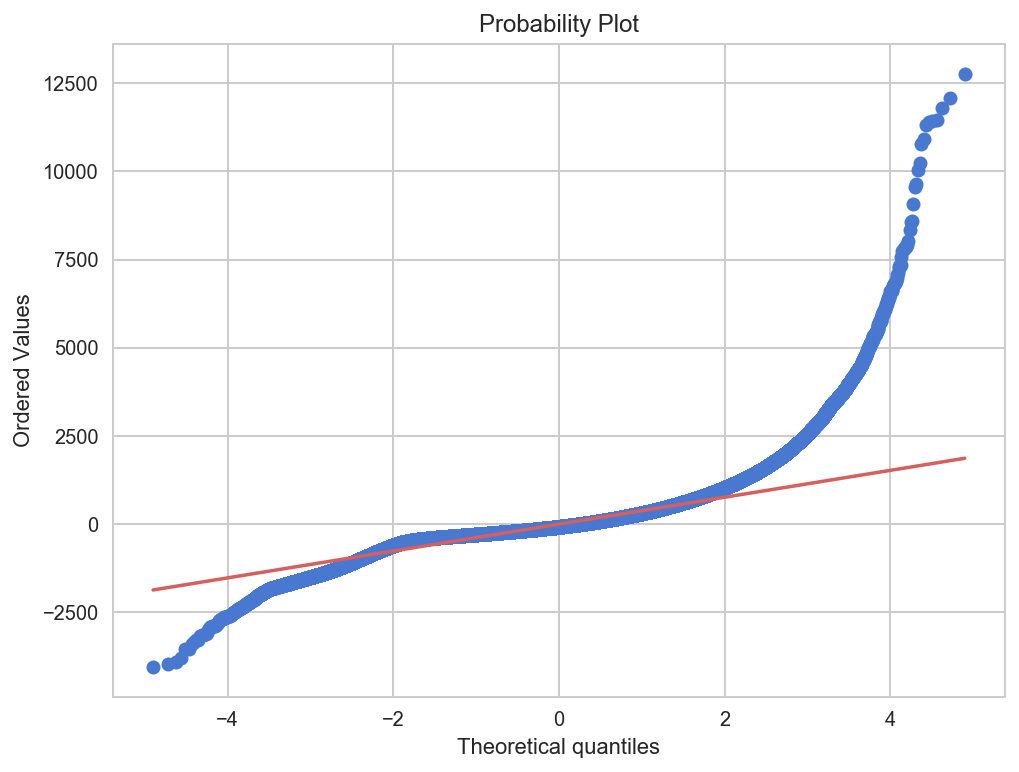

In [27]:
# 잔차 정규성
f, ax = plt.subplots(figsize=(8, 6))
sp.stats.probplot(result_2.resid, plot = plt)
plt.show()

In [28]:
# Resid test1 
test_resid1 = sms.omni_normtest(result_2.resid)
for xi in zip(['Chi^2', 'P-value'], test_resid1):
    print("%-12s: %6.3f" % xi)

Chi^2       : 782332.232
P-value     :  0.000


In [29]:
# Resid test2     
test_resid2 = sms.jarque_bera(result_2.resid)
for xi in zip(['Jarque-Bera', 'P-value', 'Skew', 'Kurtosis'], test_resid2):
    print("%-12s: %6.3f" % xi)

Jarque-Bera : 21437980.785
P-value     :  0.000
Skew        :  2.052
Kurtosis    : 21.343


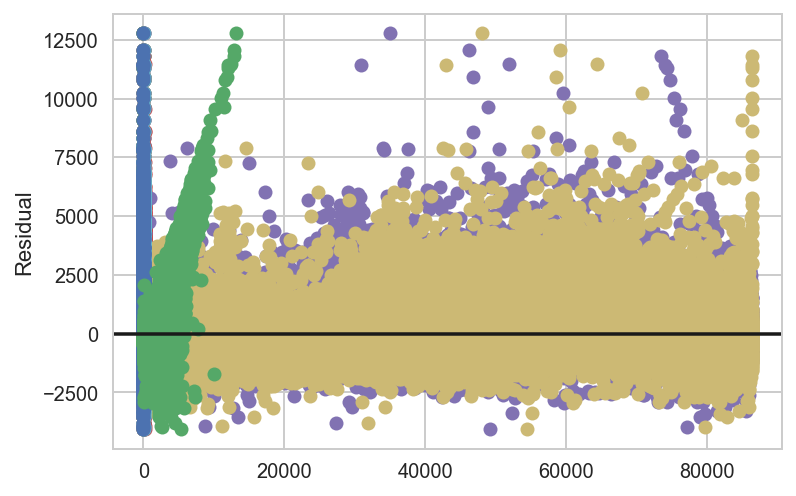

In [30]:
# x값에 따른 잔차의 분포 (시간이 걸려서 일단 패스)
plt.plot(taxi_2, result_2.resid, 'o')
plt.axhline(y=0, c='k')
plt.ylabel("Residual")
plt.show()

---

## 05. 스케일링 (scaling)

In [31]:
# 스케일 진행할 데이터 생성
taxi_3 = taxi_2.rename(index=str, columns={ 
                     'scale(pickup_longitude)':'pickup_longitude',
                     'scale(pickup_latitude)':'pickup_latitude', 
                     'scale(dropoff_longitude)':'dropoff_longitude',
                     'scale(dropoff_latitude)':'dropoff_latitude', 
                     'scale(store_and_fwd_flag)':'store_and_fwd_flag',
                     'scale(dist)':'dist',
                     'scale(pick_date)' : 'pick_date',
                     'scale(pick_time)'  : 'pick_time', 
                     'scale(drop_time)' : 'drop_time',})

In [32]:
taxi_3.tail()

,Intercept,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,dist,pick_date,pick_time,drop_time,weekday,holiday,trip_duration
1456321,1.00,4.00,-73.98,40.75,-73.99,40.74,0.00,1.22,98.00,48663.00,49441.00,5.00,1.00,778.00
1456322,1.00,1.00,-74.00,40.75,-73.97,40.80,0.00,6.05,9.00,27314.00,27969.00,7.00,1.00,655.00
1456323,1.00,1.00,-73.96,40.77,-74.00,40.71,0.00,7.82,112.00,25060.00,25824.00,5.00,1.00,764.00
1456324,1.00,1.00,-73.98,40.75,-73.97,40.76,0.00,1.09,4.00,57385.00,57758.00,2.00,1.00,373.00
1456325,1.00,1.00,-73.98,40.78,-73.97,40.79,0.00,1.13,95.00,53064.00,53262.00,2.00,1.00,198.00


In [33]:
# category 변수 제외하고 scale 진행
feature_n_3, features_3 = get_features(taxi_3, 2, -3, scale = True)
feature_n_3, features_3

(9,
 'scale(pickup_longitude) + scale(pickup_latitude) + scale(dropoff_longitude) + scale(dropoff_latitude) + scale(store_and_fwd_flag) + scale(dist) + scale(pick_date) + scale(pick_time) + scale(drop_time)')

In [34]:
model_3 =  sm.OLS.from_formula("trip_duration ~ C(passenger_count) + C(weekday) + C(holiday) + {} ".format(features_3), data = taxi_3)
result_3 = model_3.fit()
result_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          trip_duration   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                 9.253e+04
Date:                Tue, 13 Mar 2018   Prob (F-statistic):               0.00
Time:                        01:01:42   Log-Likelihood:            -1.0822e+07
No. Observations:             1456326   AIC:                         2.164e+07
Df Residuals:                 1456300   BIC:                         2.164e+07
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                   600.6679     53.164     11.298      0.000     496.468     704.868
C(passenger_count)[T.1.0]   196.2743     53.158      3.692      0.000      92.086     300.462
C(passenger_count)[T.2.0]   218.1062     53.164      4.103      0.000     113.906     322.306
C(passenger_count)[T.3.0]   223.8255     53.183      4.209      0.000     119.589     328.062
C(passenger_count)[T.4.0]   233.2091     53.212      4.383      0.000     128.916     337.503
C(passenger_count)[T.5.0]   201.6050     53.177      3.791      0.000      97.380     305.830
C(passenger_count)[T.6.0]   208.3170     53.189      3.917      0.000     104.068     312.566
C(passenger_count)[T.7.0]  -112.5902    241.642     -0.466      0.641    -586.200     361.019
C(passenger_count)[T.8.0]  -847.0156    411.736     -2.057      0.040   -1654.004     -40.027
C(passenger_count)[T.9.0]   687.7492    411.748      1.670      0.095    -119.262    1494.761
C(weekday)[T.2.0]            62.2212      1.332     46.725      0.000      59.611      64.831
C(weekday)[T.3.0]            86.8354      1.321     65.748      0.000      84.247      89.424
C(weekday)[T.4.0]            93.8992      1.309     71.726      0.000      91.333      96.465
C(weekday)[T.5.0]            78.1810      1.283     60.924      0.000      75.666      80.696
C(weekday)[T.6.0]           -10.4522      1.310     -7.979      0.000     -13.020      -7.885
C(weekday)[T.7.0]           -72.6293      1.349    -53.855      0.000     -75.273     -69.986
C(holiday)[T.2.0]           -87.1733      2.271    -38.380      0.000     -91.625     -82.722
scale(pickup_longitude)     -21.0169      0.400    -52.491      0.000     -21.802     -20.232
scale(pickup_latitude)       27.9409      0.394     70.850      0.000      27.168      28.714
scale(dropoff_longitude)    -33.8205      0.375    -90.213      0.000     -34.555     -33.086
scale(dropoff_latitude)     -42.0517      0.383   -109.767      0.000     -42.803     -41.301
scale(store_and_fwd_flag)     2.3196      0.339      6.851      0.000       1.656       2.983
scale(dist)                 531.6848      0.433   1227.350      0.000     530.836     532.534
scale(pick_date)             28.4120      0.342     83.088      0.000      27.742      29.082
scale(pick_time)            -40.4337      0.938    -43.125      0.000     -42.271     -38.596
scale(drop_time)             67.8362      0.938     72.334      0.000      65.998      69.674
==============================================================================
Omnibus:                   782785.955   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         22284689.442
Skew:                           2.042   Prob(JB):                         0.00
Kurtosis:                      21.724   C

---

## 06. 변수변환

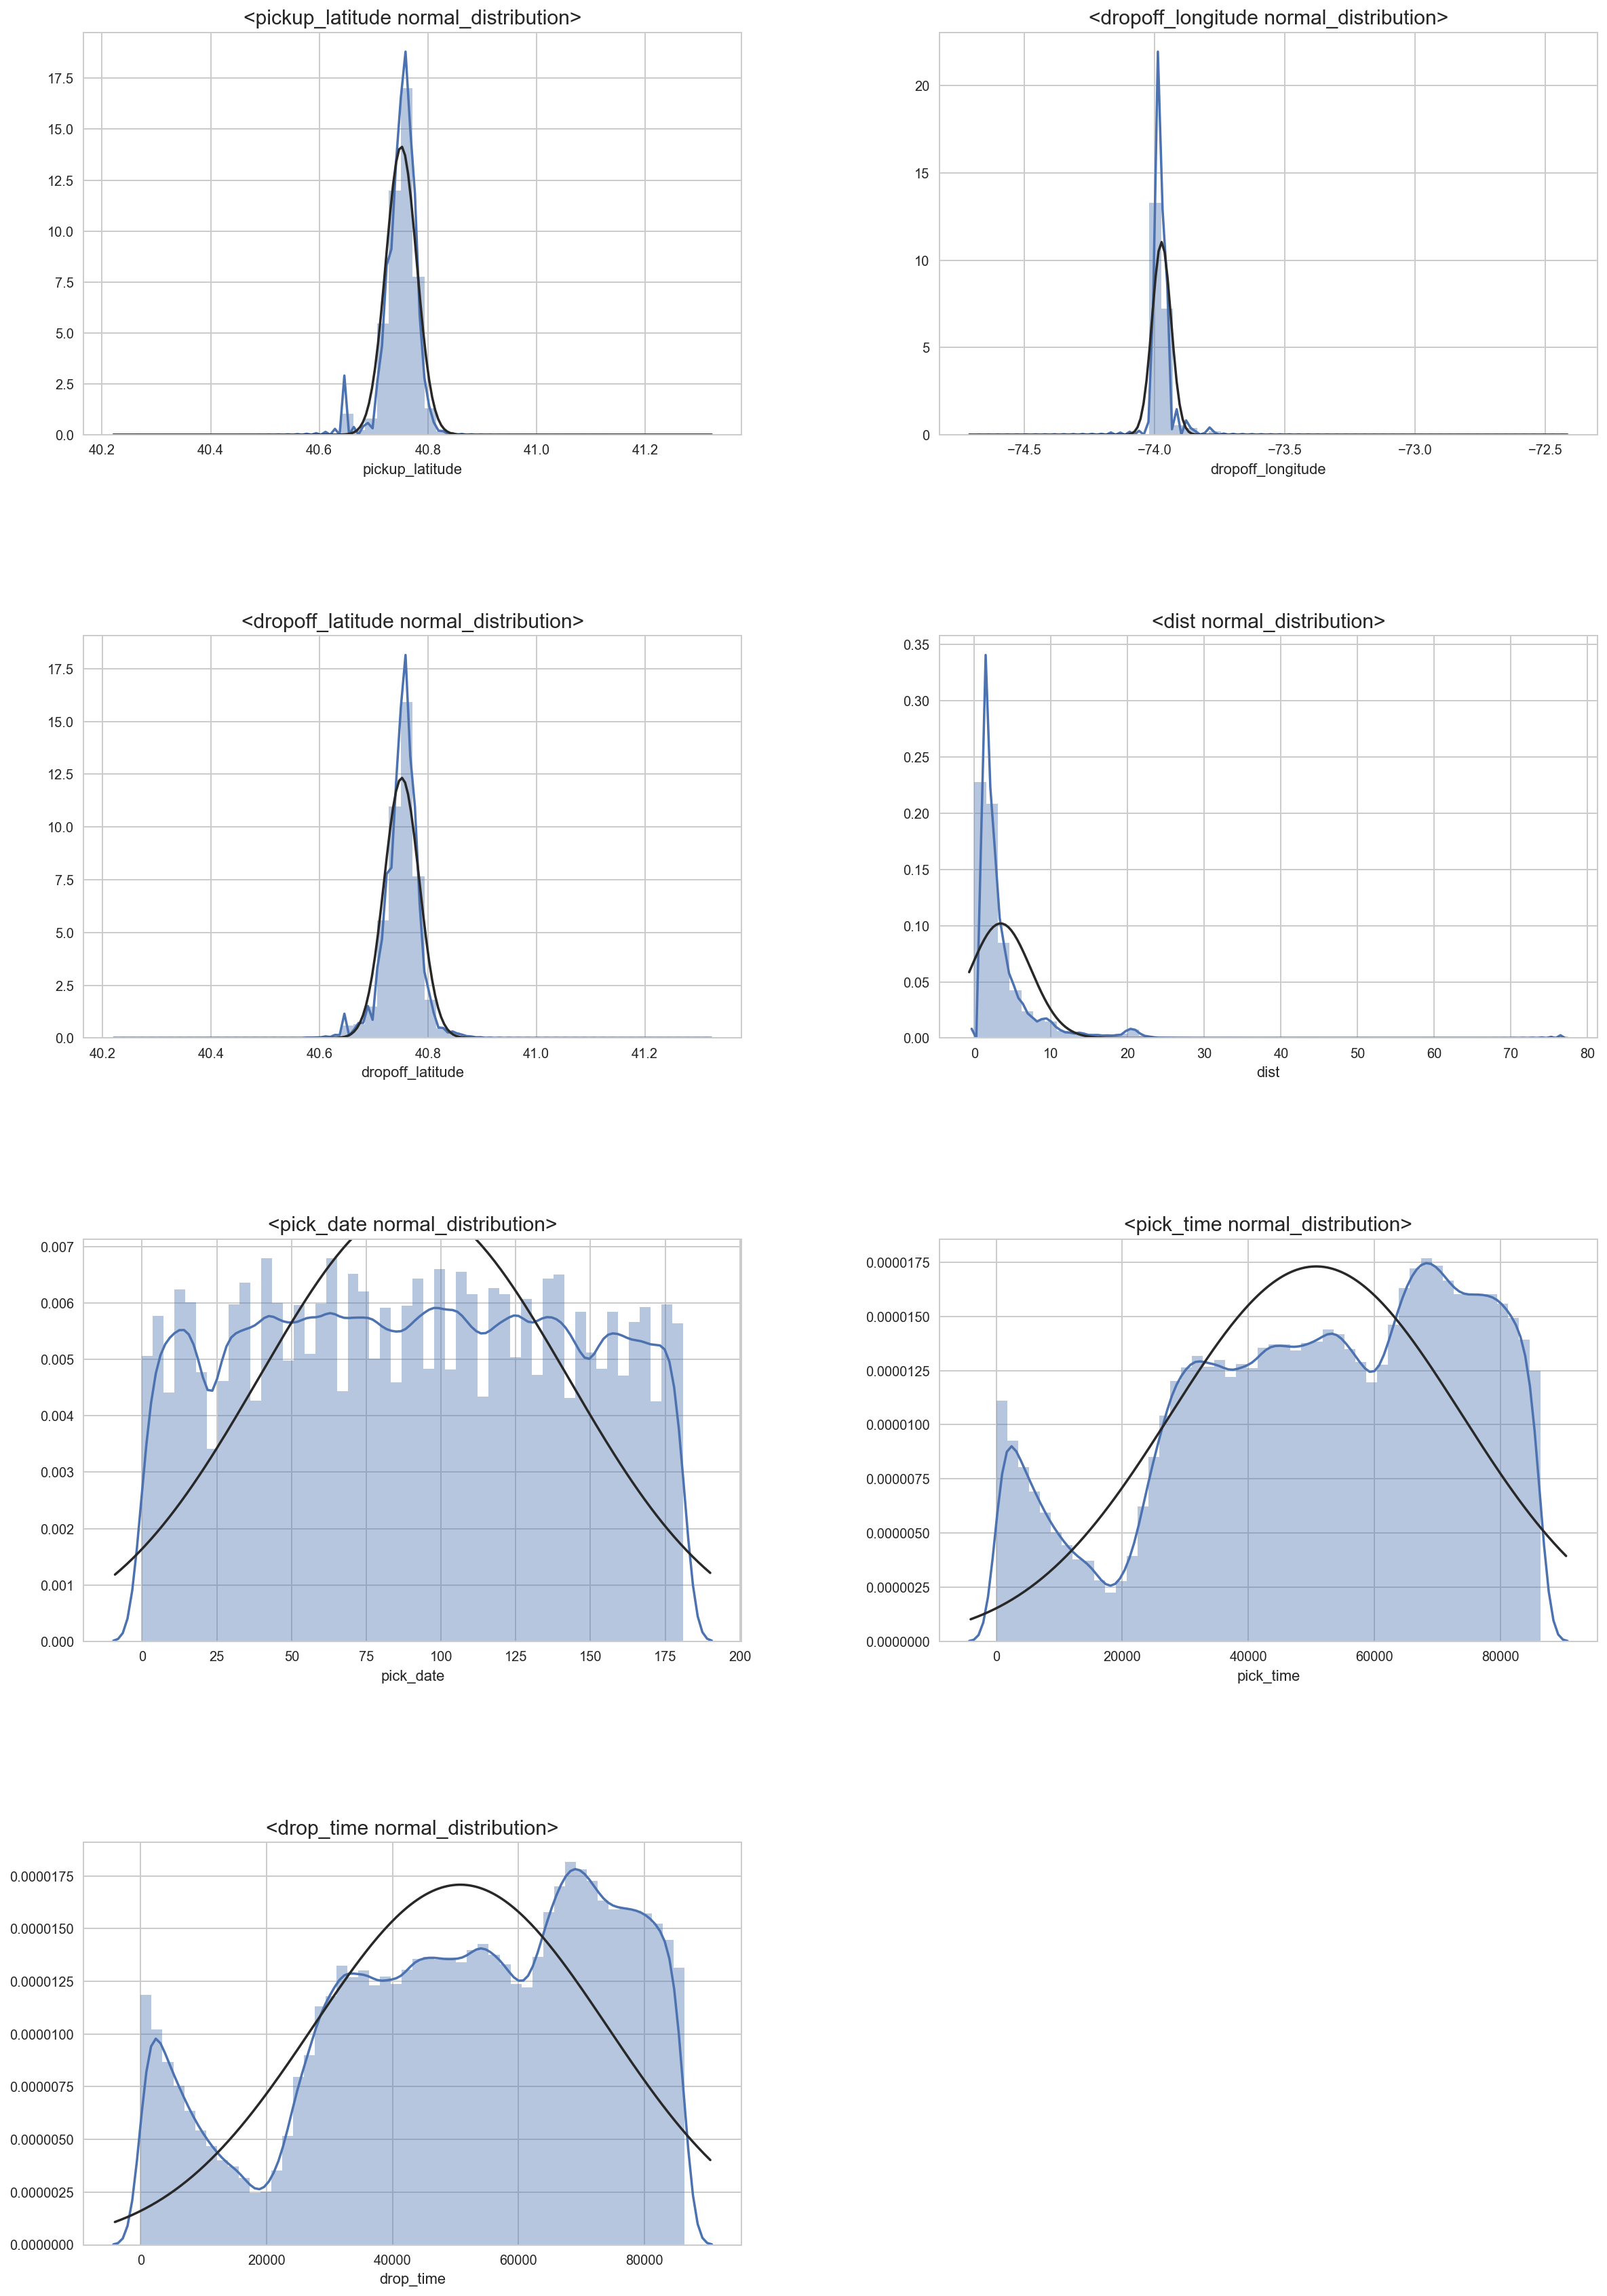

In [35]:
# 정규분포
plt.figure(figsize = (20, 30))
plt.subplots_adjust(hspace = 0.5, wspace = 0.3)

# pickup_latitude 정규분포
plt.subplot(421)
sns.distplot(taxi_3['pickup_latitude'], kde = True, fit=sp.stats.norm)
plt.title('<pickup_latitude normal_distribution>', fontsize = 15)

# dropoff_longitude 정규분포
plt.subplot(422)
sns.distplot(taxi_3['dropoff_longitude'], kde = True, fit=sp.stats.norm)
plt.title('<dropoff_longitude normal_distribution>', fontsize = 15)

# dropoff_latitude 정규분포
plt.subplot(423)
sns.distplot(taxi_3['dropoff_latitude'], kde = True, fit=sp.stats.norm)
plt.title('<dropoff_latitude normal_distribution>', fontsize = 15)

# dist 정규분포
plt.subplot(424)
sns.distplot(taxi_3['dist'], kde = True, fit=sp.stats.norm)
plt.title('<dist normal_distribution>', fontsize = 15)

# pick_date 정규분포
plt.subplot(425)
sns.distplot(taxi_3['pick_date'], kde = True, fit = sp.stats.norm)
plt.title('<pick_date normal_distribution>', fontsize = 15)

# pick_time 정규분포
plt.subplot(426)
sns.distplot(taxi_3['pick_time'], kde=True, fit = sp.stats.norm)
plt.title('<pick_time normal_distribution>', fontsize = 15)

# drop_time 정규분포
plt.subplot(427)
sns.distplot(taxi_3['drop_time'], kde = True, fit = sp.stats.norm)
plt.title('<drop_time normal_distribution>', fontsize = 15)

plt.show()

---

Text(0.5,1,'<dist normal_distribution>')

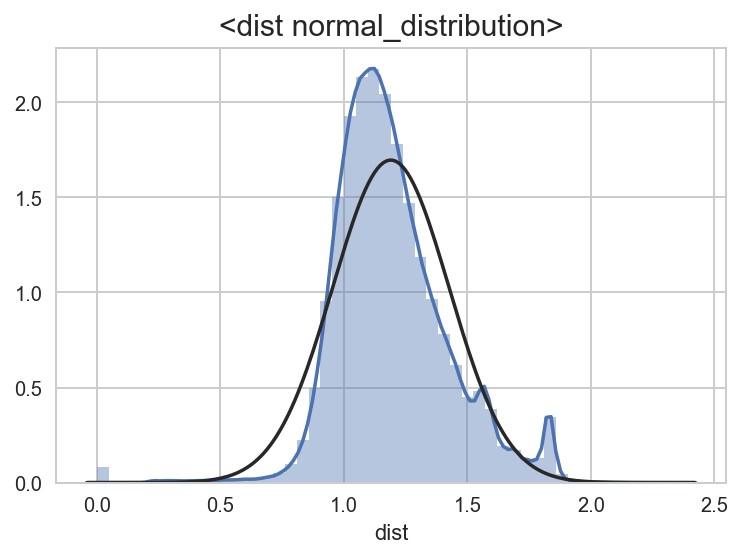

In [44]:
sns.distplot(taxi_3['dist']**0.2, kde = True, fit=sp.stats.norm)
plt.title('<dist normal_distribution>', fontsize = 15)

## 08. 다중공선성

### 8.1 상관분석

In [45]:
# 상관분석
taxi_4 = taxi_3.drop(['Intercept', 'trip_duration'], axis = 1)
taxi_4.corr()

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,dist,pick_date,pick_time,drop_time,weekday,holiday
passenger_count,1.00,0.00,-0.01,-0.00,-0.00,-0.02,0.01,-0.00,0.01,0.01,0.03,0.00
pickup_longitude,0.00,1.00,-0.14,0.29,0.04,0.02,0.51,0.01,0.02,0.02,-0.03,0.01
pickup_latitude,-0.01,-0.14,1.00,0.05,0.43,-0.01,-0.31,-0.00,0.01,0.02,-0.03,-0.00
dropoff_longitude,-0.00,0.29,0.05,1.00,0.13,0.02,0.36,0.01,-0.04,-0.04,-0.00,0.00
dropoff_latitude,-0.00,0.04,0.43,0.13,1.00,-0.01,-0.16,-0.00,0.02,0.02,-0.02,-0.00
store_and_fwd_flag,-0.02,0.02,-0.01,0.02,-0.01,1.00,0.03,0.00,0.00,0.00,-0.00,0.00
dist,0.01,0.51,-0.31,0.36,-0.16,0.03,1.00,0.02,-0.02,-0.02,0.01,0.01
pick_date,-0.00,0.01,-0.00,0.01,-0.00,0.00,0.02,1.00,-0.00,-0.00,-0.01,-0.14
pick_time,0.01,0.02,0.01,-0.04,0.02,0.00,-0.02,-0.00,1.00,0.93,-0.08,-0.01
drop_time,0.01,0.02,0.02,-0.04,0.02,0.00,-0.02,-0.00,0.93,1.00,-0.09,-0.01


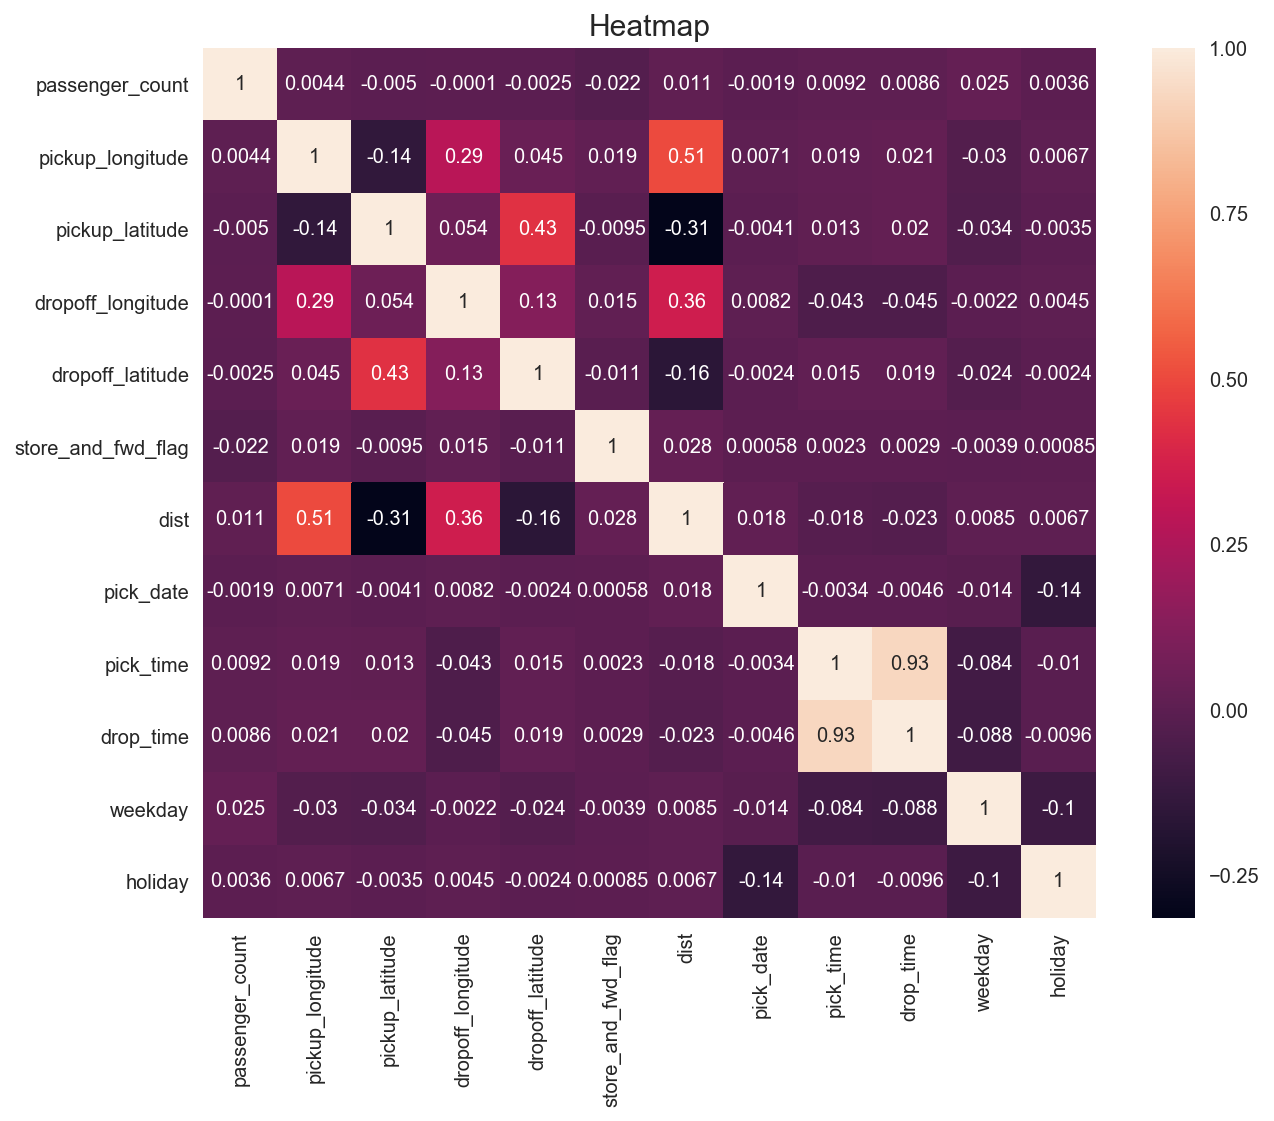

In [52]:
# heatmap
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(taxi_4.corr(), annot=True)
plt.title("<Heatmap>", fontsize = 15)
plt.show()

### 8.2 VIF (Variance Inflation Factor)

In [53]:
# VIF로 다중공선성 제거
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(taxi_4.values, i) for i in range(taxi_4.shape[1])]
vif["features"] = taxi_4.columns
vif

,VIF Factor,features
0,2.61,passenger_count
1,3553485.98,pickup_longitude
2,2514456.56,pickup_latitude
3,3090041.87,dropoff_longitude
4,1774155.95,dropoff_latitude
5,1.01,store_and_fwd_flag
6,1.84,dist
7,4.19,pick_date
8,44.88,pick_time
9,43.97,drop_time


In [54]:
# 다중공선성이 높은 요인 제거
taxi_5 = taxi_3.drop(["pickup_longitude", "pickup_latitude", "dropoff_longitude", "dropoff_latitude"], axis = 1)
taxi_5.head()

,Intercept,passenger_count,store_and_fwd_flag,dist,pick_date,pick_time,drop_time,weekday,holiday,trip_duration
0,1.00,1.00,0.00,1.50,73.00,62694.00,63149.00,1.00,1.00,455.00
1,1.00,1.00,0.00,1.80,163.00,2614.00,3277.00,7.00,1.00,663.00
2,1.00,1.00,0.00,6.38,18.00,41723.00,43847.00,2.00,1.00,2124.00
3,1.00,1.00,0.00,1.48,96.00,70350.00,70779.00,3.00,1.00,429.00
4,1.00,1.00,0.00,1.19,85.00,48654.00,49089.00,6.00,1.00,435.00


In [58]:
feature_n_5, features_5 = get_features(taxi_5, 3, 6+1)
feature_n_5, features_5

(4, 'dist + pick_date + pick_time + drop_time')

In [59]:
model_5 =  sm.OLS.from_formula("trip_duration ~ C(passenger_count) + C(store_and_fwd_flag) + C(weekday) + C(holiday) + {} ".format(features_5), data = taxi_5)
result_5 = model_5.fit()
result_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          trip_duration   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                 1.066e+05
Date:                Tue, 13 Mar 2018   Prob (F-statistic):               0.00
Time:                        01:14:01   Log-Likelihood:            -1.0837e+07
No. Observations:             1456326   AIC:                         2.167e+07
Df Residuals:                 1456304   BIC:                         2.167e+07
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       24.0235     53.710      0.447      0.655     -81.246     129.293
C(passenger_count)[T.1.0]      217.0804     53.697      4.043      0.000     111.836     322.324
C(passenger_count)[T.2.0]      239.5046     53.703      4.460      0.000     134.249     344.761
C(passenger_count)[T.3.0]      245.9331     53.722      4.578      0.000     140.640     351.226
C(passenger_count)[T.4.0]      255.8694     53.751      4.760      0.000     150.519     361.220
C(passenger_count)[T.5.0]      222.5208     53.716      4.143      0.000     117.240     327.802
C(passenger_count)[T.6.0]      228.7399     53.728      4.257      0.000     123.434     334.045
C(passenger_count)[T.7.0]     -147.2087    244.098     -0.603      0.546    -625.632     331.214
C(passenger_count)[T.8.0]     -689.5476    415.919     -1.658      0.097   -1504.735     125.640
C(passenger_count)[T.9.0]      323.3293    415.914      0.777      0.437    -491.848    1138.507
C(store_and_fwd_flag)[T.1.0]    30.9283      4.623      6.690      0.000      21.867      39.989
C(weekday)[T.2.0]               63.4225      1.345     47.149      0.000      60.786      66.059
C(weekday)[T.3.0]               88.5349      1.334     66.368      0.000      85.920      91.149
C(weekday)[T.4.0]               96.1302      1.322     72.706      0.000      93.539      98.722
C(weekday)[T.5.0]               80.2593      1.296     61.928      0.000      77.719      82.799
C(weekday)[T.6.0]               -5.8250      1.322     -4.407      0.000      -8.416      -3.234
C(weekday)[T.7.0]              -70.3155      1.362    -51.640      0.000     -72.984     -67.647
C(holiday)[T.2.0]              -86.7761      2.294    -37.822      0.000     -91.273     -82.279
dist                           129.5318      0.087   1480.772      0.000     129.360     129.703
pick_date                        0.5516      0.007     82.342      0.000       0.538       0.565
pick_time                       -0.0017   4.11e-05    -42.128      0.000      -0.002      -0.002
drop_time                        0.0029   4.05e-05     71.442      0.000       0.003       0.003
==============================================================================
Omnibus:                   759163.814   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         20133170.623
Skew:                           1.976   Prob(JB):                         0.00
Kurtosis:                      20.781   Cond. No.                     9.69e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.69e+07. This might indicate that there are
s

---

## 09. 다항회귀

In [60]:
# dist
model_6 =  sm.OLS.from_formula('trip_duration ~ dist', data = taxi_5)
result_6 = model_6.fit()
print(result_6.summary())

# 제곱 추가
model_6 =  sm.OLS.from_formula('trip_duration ~ dist + I(dist**2)', data = taxi_5)
result_6 = model_6.fit()
print(result_6.summary())

# 세제곱 추가
model_6 =  sm.OLS.from_formula('trip_duration ~ dist + I(dist**2) + I(dist**3)', data = taxi_5)
result_6 = model_6.fit()
print(result_6.summary())

# 네제곱 추가
model_6 =  sm.OLS.from_formula('trip_duration ~ dist + I(dist**2) + I(dist**3) + I(dist**4)', data = taxi_5)
result_6 = model_6.fit()
print(result_6.summary())

                            OLS Regression Results                            
Dep. Variable:          trip_duration   R-squared:                       0.592
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                 2.115e+06
Date:                Tue, 13 Mar 2018   Prob (F-statistic):               0.00
Time:                        01:14:10   Log-Likelihood:            -1.0861e+07
No. Observations:             1456326   AIC:                         2.172e+07
Df Residuals:                 1456324   BIC:                         2.172e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    393.5104      0.462    851.503      0.0

In [61]:
# pick_date
model_7 =  sm.OLS.from_formula('trip_duration ~ pick_date', data = taxi_5)
result_7 = model_7.fit()
print(result_7.summary())

# 제곱 추가
model_7 =  sm.OLS.from_formula('trip_duration ~ pick_date + I(pick_date**2)', data = taxi_5)
result_7 = model_7.fit()
print(result_7.summary())

# 세제곱 추가
model_7 =  sm.OLS.from_formula('trip_duration ~ pick_date + I(pick_date**2) + I(pick_date**3)', data = taxi_5)
result_7 = model_7.fit()
print(result_7.summary())

# 네제곱 추가
model_7 =  sm.OLS.from_formula('trip_duration ~ pick_date + I(pick_date**2) + I(pick_date**3) + I(pick_date**4)', data = taxi_5)
result_7 = model_7.fit()
print(result_7.summary())

                            OLS Regression Results                            
Dep. Variable:          trip_duration   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     5407.
Date:                Tue, 13 Mar 2018   Prob (F-statistic):               0.00
Time:                        01:14:13   Log-Likelihood:            -1.1512e+07
No. Observations:             1456326   AIC:                         2.302e+07
Df Residuals:                 1456324   BIC:                         2.302e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    765.9714      1.101    696.013      0.0

In [62]:
# pick_time
model_8 =  sm.OLS.from_formula('trip_duration ~ pick_time', data = taxi_5)
result_8 = model_8.fit()
print(result_8.summary())

# 제곱 추가
model_8 =  sm.OLS.from_formula('trip_duration ~ pick_time + I(pick_time**2)', data = taxi_5)
result_8 = model_8.fit()
print(result_8.summary())

# 세제곱 추가
model_8 =  sm.OLS.from_formula('trip_duration ~ pick_time + I(pick_time**2) + I(pick_time**3)', data = taxi_5)
result_8 = model_8.fit()
print(result_8.summary())

# 네제곱 추가
model_8 =  sm.OLS.from_formula('trip_duration ~ pick_time + I(pick_time**2) + I(pick_time**3) + I(pick_time**4)', data = taxi_5)
result_8 = model_8.fit()
print(result_8.summary())

                            OLS Regression Results                            
Dep. Variable:          trip_duration   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1227.
Date:                Tue, 13 Mar 2018   Prob (F-statistic):          8.70e-269
Time:                        01:14:25   Log-Likelihood:            -1.1514e+07
No. Observations:             1456326   AIC:                         2.303e+07
Df Residuals:                 1456324   BIC:                         2.303e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    794.3616      1.316    603.539      0.0

In [63]:
# drop_time
model_9 =  sm.OLS.from_formula('trip_duration ~ drop_time', data = taxi_5)
result_9 = model_9.fit()
print(result_9.summary())

# 제곱 추가
model_9 =  sm.OLS.from_formula('trip_duration ~ drop_time + I(drop_time**2)', data = taxi_5)
result_9 = model_9.fit()
print(result_9.summary())

# 세제곱 추가
model_9 =  sm.OLS.from_formula('trip_duration ~ drop_time + I(drop_time**2) + I(drop_time**3)', data = taxi_5)
result_9 = model_9.fit()
print(result_8.summary())

# 네제곱 추가
model_9 =  sm.OLS.from_formula('trip_duration ~ drop_time + I(drop_time**2) + I(drop_time**3) + I(drop_time**4)', data = taxi_5)
result_9 = model_9.fit()
print(result_9.summary())

                            OLS Regression Results                            
Dep. Variable:          trip_duration   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1900.
Date:                Tue, 13 Mar 2018   Prob (F-statistic):               0.00
Time:                        01:14:30   Log-Likelihood:            -1.1513e+07
No. Observations:             1456326   AIC:                         2.303e+07
Df Residuals:                 1456324   BIC:                         2.303e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    784.8093      1.301    603.005      0.0

---

## 10. 최적화

In [64]:
taxi_5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1456326 entries, 0 to 1456325
Data columns (total 10 columns):
Intercept             1456326 non-null float64
passenger_count       1456326 non-null float64
store_and_fwd_flag    1456326 non-null float64
dist                  1456326 non-null float64
pick_date             1456326 non-null float64
pick_time             1456326 non-null float64
drop_time             1456326 non-null float64
weekday               1456326 non-null float64
holiday               1456326 non-null float64
trip_duration         1456326 non-null float64
dtypes: float64(10)
memory usage: 162.2+ MB


In [66]:
model_10 =  sm.OLS.from_formula('trip_duration ~ C(store_and_fwd_flag) + C(passenger_count) + C(weekday) + C(holiday) + dist + I(dist**2) + I(dist**3) + I(dist**4) + pick_date + I(pick_date**2) + pick_time + I(pick_time**2) + drop_time + I(drop_time**2)', data = taxi_5)
result_10 = model_10.fit()
print(result_10.summary())

                            OLS Regression Results                            
Dep. Variable:          trip_duration   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                 1.137e+05
Date:                Tue, 13 Mar 2018   Prob (F-statistic):               0.00
Time:                        01:18:21   Log-Likelihood:            -1.0689e+07
No. Observations:             1456326   AIC:                         2.138e+07
Df Residuals:                 1456298   BIC:                         2.138e+07
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

---

## 11. 교차검증